<a href="https://colab.research.google.com/github/skywalker0803r/works/blob/master/%E5%8F%B0%E5%8C%96%E4%BA%8C%E9%83%A8_0912.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [24]:
data_path = '/content/gdrive/My Drive/台化二部/複本 操作與品管數據(20190723提供).xlsx'
df = pd.read_excel(data_path,header=2,index_col=0)
df = df.drop_duplicates()
print(df.shape)
df.head()

(81526, 12)


,PHL-DCS-FIC1147_PV,PHL-DCS-FIC1149A_PV,PHL-DCS-TIC1163_PV,PHL-DCS-PI1162_PV,PHL-DCS-TI1166_PV,PHL-DCS-TI1167_PV,PHL-DCS-TI1168_PV,PHL-DCS-TI1169_PV,PHL-DCS-TI1170_PV,PHL-DCS-PIC1166_PV,T121 EB含量,DIPB轉化率
DATE,,,,,,,,,,,,
2013-08-20 10:10:00,31.212050,24.992781,169.893986,NaN,167.057086,166.569303,166.278953,165.041317,NaN,12.297010,NaN,NaN
2013-08-20 10:20:00,31.223557,25.066836,169.752653,NaN,167.050706,166.575684,166.259814,164.969540,NaN,12.291411,NaN,NaN
2013-08-20 10:30:00,31.572592,25.163049,169.525828,NaN,167.042458,166.583934,166.235069,164.876743,NaN,12.317545,NaN,NaN
2013-08-20 10:40:00,31.886214,25.136713,169.316875,NaN,167.034209,166.592183,166.210325,164.783946,NaN,12.317918,NaN,NaN
2013-08-20 10:50:00,31.855439,25.220729,169.665105,NaN,167.025961,166.600433,166.185580,164.691149,NaN,12.315540,NaN,NaN


# columns type transform 這裡異常值就會被np.nan取代

In [25]:
for i in df.columns:
  df[i] = pd.to_numeric(df[i],errors='coerce')
df.dtypes

PHL-DCS-FIC1147_PV     float64
PHL-DCS-FIC1149A_PV    float64
PHL-DCS-TIC1163_PV     float64
PHL-DCS-PI1162_PV      float64
PHL-DCS-TI1166_PV      float64
PHL-DCS-TI1167_PV      float64
PHL-DCS-TI1168_PV      float64
PHL-DCS-TI1169_PV      float64
PHL-DCS-TI1170_PV      float64
PHL-DCS-PIC1166_PV     float64
T121 EB含量              float64
DIPB轉化率                float64
dtype: object

# miss value

In [26]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
missing_values_table(df)

Your selected dataframe has 12 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
DIPB轉化率,81038,99.4
T121 EB含量,79977,98.1
PHL-DCS-PI1162_PV,45775,56.1
PHL-DCS-TI1170_PV,45774,56.1
PHL-DCS-FIC1147_PV,2,0.0
PHL-DCS-FIC1149A_PV,2,0.0
PHL-DCS-TIC1163_PV,2,0.0
PHL-DCS-TI1166_PV,2,0.0
PHL-DCS-TI1167_PV,2,0.0
PHL-DCS-TI1168_PV,2,0.0


# 看看高缺值的欄位怎麼回事

In [27]:
df_index = df.index
DIPB_index = df[df['DIPB轉化率'].isnull()==False].index
T121_index = df[df['T121 EB含量'].isnull()==False].index
PI1162_index = df[df['PHL-DCS-PI1162_PV'].isnull()==False].index
TI1170_index = df[df['PHL-DCS-TI1170_PV'].isnull()==False].index	

for name,index in zip(['df_index','DIPB_index','T121_index','PI1162_index','TI1170_index'],
                      [df_index,DIPB_index,T121_index,PI1162_index,TI1170_index]):
  print(name)
  print('起始時間:{} 結束時間:{} 取樣頻率:{}'.format(index[0],index[-1],index[1]-index[0]))

df_index
起始時間:2013-08-20 10:10:00 結束時間:2015-03-19 23:50:00 取樣頻率:0 days 00:10:00
DIPB_index
起始時間:2013-08-22 00:00:00 結束時間:2015-02-17 00:00:00 取樣頻率:1 days 00:00:00
T121_index
起始時間:2013-08-20 16:00:00 結束時間:2015-03-19 16:00:00 取樣頻率:0 days 08:00:00
PI1162_index
起始時間:2014-07-14 10:40:00 結束時間:2015-03-19 23:50:00 取樣頻率:0 days 00:10:00
TI1170_index
起始時間:2014-07-14 10:30:00 結束時間:2015-03-19 23:50:00 取樣頻率:0 days 00:10:00


多數欄位10分鐘取樣一次,1小時就6筆,24小時就24*6 = 144筆

DIPB 1天取樣一次所以應該跟前144筆資料有關

T121 8小時取樣一次 6*8=48所以T121和前48筆資料有關

PI1162和TI1170取樣頻率雖然也是10分鐘一筆 但起始時間是2014年開始,可能後來才加裝

因此可以分兩部分做 先做缺少PI1162和TI1170那段日子的分析,再做加裝後的分析

# 取加裝前的資料

In [28]:
#df_1:前半段日子,缺少PI1162和TI1170那段日子
前半段日子條件 = (df['PHL-DCS-PI1162_PV'].isnull()==True)&(df['PHL-DCS-TI1170_PV'].isnull()==True)
df_1 = df[前半段日子條件].dropna(how='all',axis=1)
print(df_1.shape)
df_1.head()

(45774, 10)


,PHL-DCS-FIC1147_PV,PHL-DCS-FIC1149A_PV,PHL-DCS-TIC1163_PV,PHL-DCS-TI1166_PV,PHL-DCS-TI1167_PV,PHL-DCS-TI1168_PV,PHL-DCS-TI1169_PV,PHL-DCS-PIC1166_PV,T121 EB含量,DIPB轉化率
DATE,,,,,,,,,,
2013-08-20 10:10:00,31.212050,24.992781,169.893986,167.057086,166.569303,166.278953,165.041317,12.297010,NaN,NaN
2013-08-20 10:20:00,31.223557,25.066836,169.752653,167.050706,166.575684,166.259814,164.969540,12.291411,NaN,NaN
2013-08-20 10:30:00,31.572592,25.163049,169.525828,167.042458,166.583934,166.235069,164.876743,12.317545,NaN,NaN
2013-08-20 10:40:00,31.886214,25.136713,169.316875,167.034209,166.592183,166.210325,164.783946,12.317918,NaN,NaN
2013-08-20 10:50:00,31.855439,25.220729,169.665105,167.025961,166.600433,166.185580,164.691149,12.315540,NaN,NaN


In [29]:
df_1.describe()

,PHL-DCS-FIC1147_PV,PHL-DCS-FIC1149A_PV,PHL-DCS-TIC1163_PV,PHL-DCS-TI1166_PV,PHL-DCS-TI1167_PV,PHL-DCS-TI1168_PV,PHL-DCS-TI1169_PV,PHL-DCS-PIC1166_PV,T121 EB含量,DIPB轉化率
count,45772.000000,45772.000000,45772.000000,45772.000000,45772.000000,45772.000000,45772.000000,45772.000000,822.000000,276.000000
mean,28.237986,21.093750,160.998633,148.777996,148.441374,148.194353,146.217387,10.664256,104.681265,64.351514
std,11.970688,8.286521,20.576068,45.858156,46.041152,46.097816,46.643249,4.083040,29.400558,10.868958
min,0.030600,0.000000,110.036342,17.491865,17.297280,17.147366,0.000000,0.000000,12.000000,-1.459854
25%,29.918217,23.462331,166.540533,163.938281,163.566360,163.275621,161.948781,12.296595,86.000000,64.149195
50%,31.435306,24.510155,169.100671,166.613922,166.215408,165.887557,164.515760,12.299358,100.000000,67.348782
75%,33.198007,25.079975,170.502798,167.673223,167.692276,167.458333,166.511186,12.301554,111.000000,69.741737
max,52.727678,29.718892,184.354069,182.300190,177.200827,187.304338,171.701019,12.486687,283.000000,72.991308


# distplot

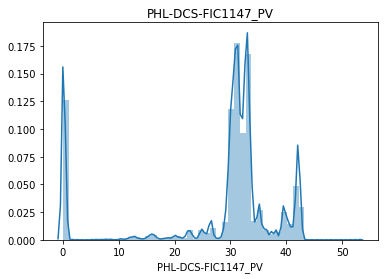

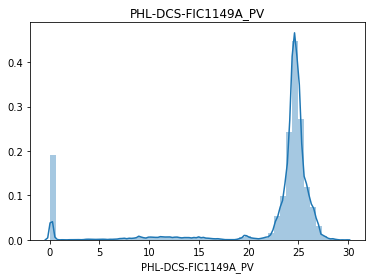

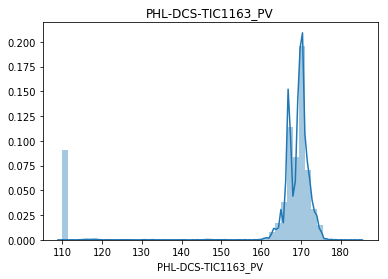

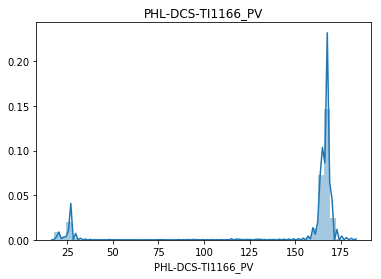

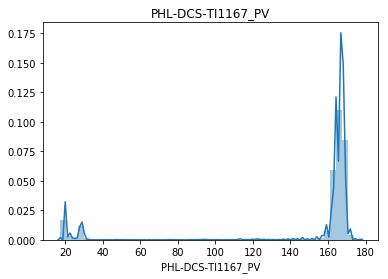

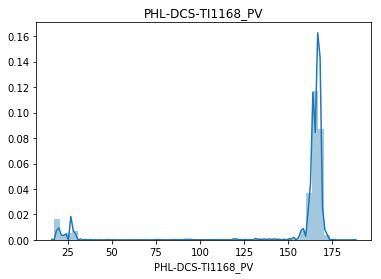

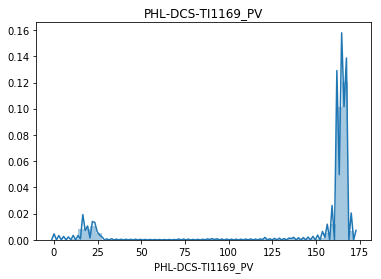

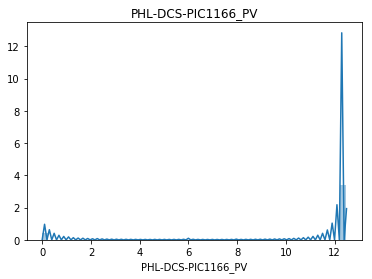

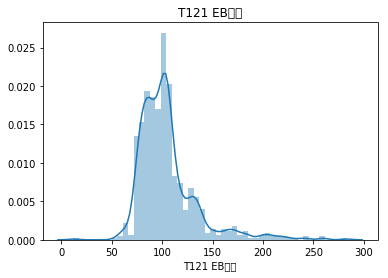

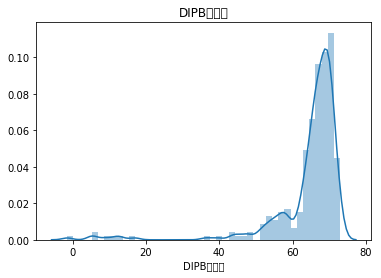

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in df_1.columns:
  sns.distplot(df_1[i].dropna())
  plt.title(i)
  plt.show()

# Xs ys 準備

In [36]:
from tqdm import tqdm
import numpy as np

#定義觀察天數,起始index(0),結束index(資料筆數-觀察天數)
days = 144
b_index = 0
f_index = len(df)-days

#目標欄位
y_name = 'DIPB轉化率'

#特徵欄位
features = df.drop(y_name,axis=1).columns.tolist()

#待存放序列
Xs = []
ys = []

'''
若資料筆數100,days=15天,f_index=85,i只會跑到84,i+days=99,features只會跑到98天.
若資料筆數100,days=15天,f_index=85+1,i會跑到85,i+days=100,features會跑到99天.
'''
for i in tqdm(range(b_index ,f_index+1 ,144)):#每次i都會遞增144
  X = df.iloc[i:i+days,:][features] #ex:0...14(不含15)之features
  y = df.iloc[i+days-1:i+days,:][y_name]#ex:14,y_name
  X = np.array(X) # to np_array
  Xs.append(X) #加入一筆X
  ys.append(y) #加入一筆y
  
#轉換成np_array
Xs = np.array(Xs)
ys = np.array(ys)
print('準備完成')


100%|██████████| 566/566 [00:01<00:00, 511.24it/s]

準備完成


# data check

In [40]:
print(Xs.shape)
print(ys.shape)

(566, 144, 11)
(566, 1)


In [42]:
ys[:10],ys[-10:]

(array([[nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan]]), array([[nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan]]))

In [14]:
df_1[(df_1['index']>44291-3)&(df_1['index']<44291+3)]

,PHL-DCS-FIC1147_PV,PHL-DCS-FIC1149A_PV,PHL-DCS-TIC1163_PV,PHL-DCS-TI1166_PV,PHL-DCS-TI1167_PV,PHL-DCS-TI1168_PV,PHL-DCS-TI1169_PV,PHL-DCS-PIC1166_PV,T121 EB含量,DIPB轉化率,index
DATE,,,,,,,,,,,
2014-07-04 03:10:00,42.421431,25.287783,169.994734,167.360573,167.692276,167.521127,166.528487,12.300882,NaN,NaN,44289
2014-07-04 03:20:00,42.418787,25.223983,170.000992,167.292573,167.692276,167.528198,166.590485,12.300734,NaN,NaN,44290
2014-07-04 03:30:00,42.408484,25.229512,170.033805,167.309386,167.701628,167.524760,166.590485,12.303402,NaN,NaN,44291
2014-07-04 03:40:00,42.394726,25.257953,170.005281,167.357072,167.692276,167.453289,166.612895,12.302337,NaN,NaN,44292
2014-07-04 03:50:00,42.365479,25.229533,170.031469,167.360531,167.692276,167.469756,166.596279,12.301141,NaN,NaN,44293


In [15]:
df_1[(df_1['index']>44867-3)&(df_1['index']<44867+3)]

,PHL-DCS-FIC1147_PV,PHL-DCS-FIC1149A_PV,PHL-DCS-TIC1163_PV,PHL-DCS-TI1166_PV,PHL-DCS-TI1167_PV,PHL-DCS-TI1168_PV,PHL-DCS-TI1169_PV,PHL-DCS-PIC1166_PV,T121 EB含量,DIPB轉化率,index
DATE,,,,,,,,,,,
2014-07-08 03:10:00,42.102894,25.640122,169.950001,167.270325,167.622744,167.375915,166.525364,12.302873,NaN,NaN,44865
2014-07-08 03:20:00,42.119323,25.720867,169.990944,167.219870,167.677017,167.406384,166.496719,12.300079,NaN,NaN,44866
2014-07-08 03:30:00,42.194368,25.779293,169.890575,167.224636,167.662971,167.425084,166.496719,12.292807,NaN,NaN,44867
2014-07-08 03:40:00,42.175819,25.680713,169.942627,167.194162,167.598541,167.434433,166.496719,12.305640,NaN,NaN,44868
2014-07-08 03:50:00,42.165133,25.734088,170.039742,167.176559,167.598541,167.424849,166.496719,12.298178,NaN,NaN,44869


發現一個問題DIPB取樣時間是一天是144個row一筆,前面正常,但是到後面幾乎都是NaN

量測器壞了?,更改取樣頻率?

看看DIPB有多少個值是有值的

In [16]:
len(pd.Series(y_train).dropna())

81

只有81個y

In [17]:
new_X_train = []
new_y_train = []
for x_data,y_data in zip(X_train,y_train):
  if y_data>0:#有值才製作一筆case
    new_X_train.append(x_data)
    new_y_train.append(y_data)
    
new_X_train = np.array(new_X_train)
new_y_train = np.array(new_y_train)

print(new_X_train.shape)
print(new_y_train.shape)

(81, 144, 8)
(81,)


In [0]:
X_train , y_train = new_X_train ,new_y_train

In [19]:
print(X_train.shape)
print(y_train.shape)

(81, 144, 8)
(81,)


# LSTM Modeling

In [20]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
import keras

def build_model(input_length, input_dim):
    d = 0.3
    model = Sequential()

    model.add(LSTM(256, input_shape=(input_length, input_dim), return_sequences=True))
    model.add(Dropout(d))

    model.add(LSTM(256, input_shape=(input_length, input_dim), return_sequences=False))
    model.add(Dropout(d))

    model.add(Dense(16,kernel_initializer="uniform",activation='elu'))
    model.add(Dense(1,kernel_initializer="uniform",activation='linear'))

    model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])

    return model

# 144天、8維
model = build_model(144,8)

Using TensorFlow backend.






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [0]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=50, verbose=2,restore_best_weights=True)

In [0]:
history = model.fit( X_train ,y_train ,batch_size=X_train.shape[0] ,epochs=3000 ,validation_split=0.1 ,verbose=1 ,callbacks=[early_stopping])

Train on 72 samples, validate on 9 samples
Epoch 1/3000
72/72 [==============================] - 2s 33ms/step - loss: 3571.3516 - acc: 0.0000e+00 - val_loss: 4622.2349 - val_acc: 0.0000e+00
Epoch 2/3000
72/72 [==============================] - 1s 10ms/step - loss: 3559.1636 - acc: 0.0000e+00 - val_loss: 4607.3687 - val_acc: 0.0000e+00
Epoch 3/3000
72/72 [==============================] - 1s 10ms/step - loss: 3546.2334 - acc: 0.0000e+00 - val_loss: 4591.8184 - val_acc: 0.0000e+00
Epoch 4/3000
72/72 [==============================] - 1s 10ms/step - loss: 3532.6296 - acc: 0.0000e+00 - val_loss: 4576.0352 - val_acc: 0.0000e+00
Epoch 5/3000
72/72 [==============================] - 1s 10ms/step - loss: 3519.1440 - acc: 0.0000e+00 - val_loss: 4559.9287 - val_acc: 0.0000e+00
Epoch 6/3000
72/72 [==============================] - 1s 10ms/step - loss: 3505.0366 - acc: 0.0000e+00 - val_loss: 4543.0430 - val_acc: 0.0000e+00
Epoch 7/3000
72/72 [==============================] - 1s 10ms/step - loss: 

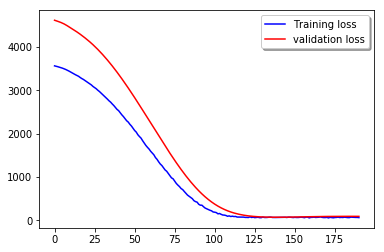

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)

# 從n次epoch以後開始看
n=1

ax.plot(history.history['loss'][n:], color='b', label="Training loss")
ax.plot(history.history['val_loss'][n:], color='r', label="validation loss")
legend = ax.legend(loc='best', shadow=True)

In [0]:
y_pred = model.predict(X_train)

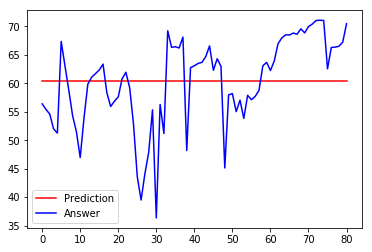

In [0]:
import matplotlib.pyplot as plt 

plt.plot(y_pred,color='red', label='Prediction')
plt.plot(y_train,color='blue', label='Answer')
plt.legend(loc='best')
plt.show()